In [1]:
#https://towardsdatascience.com/deep-neural-networks-for-regression-problems-81321897ca33

In [2]:
import os
import datetime
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from sklearn import preprocessing

In [3]:
cwd = os.getcwd()
output_dir = os.path.join(cwd, "../../../data")
df = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysis.csv"))
df_test = pd.read_csv(os.path.join(output_dir, "combined_sentimentanalysistest.csv"))
#df_test = pd.read_csv(os.path.join(output_dir, "figlet1599056546.006096_1599063766.431225.csv"))
df = df.drop(df[df.responsetime > 2].index)
df.pop('Time')
df_test = df_test.drop(df_test[df_test.responsetime > 2].index)
df_test.pop('Time')
df.head()

,cpu,diskio,diskioRead,diskioWritten,mem,networkReceived,networkTransmitted,replica,requests,responsetime,totalcpu,totalcpuUtilization,totalmemory,totalmemoryUtilization
0,7.452470,0.000129,0.000000,1.484572e+04,0.006211,7.686411e+02,690.618472,1.0,7.0,0.427801,12.0,76.330988,5.045532e+10,10.168922
1,6.314931,0.056578,903.680000,7.635895e+06,0.006211,4.423151e+06,44196.825694,1.0,42.0,0.441701,12.0,76.330988,5.045532e+10,10.168922
2,9.499113,0.073244,1001.244444,9.543407e+06,0.006211,4.011359e+06,41064.000000,1.0,76.0,0.429230,12.0,13.216667,5.045532e+10,10.329697
3,6.085528,0.073156,1001.244444,9.533212e+06,0.026095,4.012145e+06,42053.311111,1.0,112.0,0.421655,12.0,13.216667,5.045532e+10,10.329697
4,9.452724,0.021956,182.044444,2.628813e+06,0.119376,3.909378e+03,3469.288889,1.0,140.0,0.439443,12.0,14.213889,5.045532e+10,10.159327


In [4]:
df_t = pd.DataFrame()
df_ttest = pd.DataFrame()

In [5]:
df_t['total_cpu_util'] = (df['totalcpuUtilization']*df['totalcpu'])/100
df_t['total_mem_util'] = (df['totalmemoryUtilization']*df['totalmemory'])*1e-9
df_t['responsetime'] = df['responsetime']
df_t['requests'] = df['requests']
df_t['replica'] = df['replica']
df_ttest['total_cpu_util'] = (df_test['totalcpuUtilization']*df_test['totalcpu'])/100
df_ttest['total_mem_util'] = (df_test['totalmemoryUtilization']*df_test['totalmemory'])*1e-9
df_ttest['responsetime'] = df_test['responsetime']
df_ttest['requests'] = df_test['requests']
df_ttest['replica'] = df_test['replica']
df_t.head()

,total_cpu_util,total_mem_util,responsetime,requests,replica
0,9.159719,513.076211,0.427801,7.0,1.0
1,9.159719,513.076211,0.441701,42.0,1.0
2,1.586000,521.188136,0.429230,76.0,1.0
3,1.586000,521.188136,0.421655,112.0,1.0
4,1.705667,512.592066,0.439443,140.0,1.0


In [6]:
x_train = df_t[[col for col in df_t.columns if col != 'requests']]
y_train = df_t['requests']
x_train = preprocessing.normalize(x_train, norm='max')
x_test = df_ttest[[col for col in df_ttest.columns if col != 'requests']]
y_test = df_ttest['requests']
x_test = preprocessing.normalize(x_test, norm='max')

In [7]:
NN_model = Sequential()

In [8]:
# The Input Layer :
NN_model.add(Dense(4, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

In [9]:
# The Hidden Layers :
NN_model.add(Dense(5, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(5, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(4, kernel_initializer='normal',activation='relu'))

In [10]:
# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [11]:
# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 20        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 25        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 24        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5         
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


In [12]:
NN_model.fit(x_train, y_train, epochs=250, batch_size=100, validation_split = 0.2)

Epoch 1/250
6/6 [==============================] - 0s 25ms/step - loss: 1199.3595 - mean_absolute_error: 1199.3596 - val_loss: 432.5554 - val_mean_absolute_error: 432.5554
Epoch 2/250
6/6 [==============================] - 0s 6ms/step - loss: 1199.3528 - mean_absolute_error: 1199.3528 - val_loss: 432.5486 - val_mean_absolute_error: 432.5486
Epoch 3/250
6/6 [==============================] - 0s 5ms/step - loss: 1199.3459 - mean_absolute_error: 1199.3459 - val_loss: 432.5416 - val_mean_absolute_error: 432.5416
Epoch 4/250
6/6 [==============================] - 0s 6ms/step - loss: 1199.3387 - mean_absolute_error: 1199.3387 - val_loss: 432.5342 - val_mean_absolute_error: 432.5342
Epoch 5/250
6/6 [==============================] - 0s 3ms/step - loss: 1199.3312 - mean_absolute_error: 1199.3313 - val_loss: 432.5264 - val_mean_absolute_error: 432.5264
Epoch 6/250
6/6 [==============================] - 0s 5ms/step - loss: 1199.3232 - mean_absolute_error: 1199.3232 - val_loss: 432.5180 - val_mea

Epoch 49/250
6/6 [==============================] - 0s 4ms/step - loss: 1189.1365 - mean_absolute_error: 1189.1364 - val_loss: 421.8102 - val_mean_absolute_error: 421.8102
Epoch 50/250
6/6 [==============================] - 0s 4ms/step - loss: 1188.0741 - mean_absolute_error: 1188.0741 - val_loss: 420.7093 - val_mean_absolute_error: 420.7093
Epoch 51/250
6/6 [==============================] - 0s 5ms/step - loss: 1186.9283 - mean_absolute_error: 1186.9283 - val_loss: 419.5119 - val_mean_absolute_error: 419.5119
Epoch 52/250
6/6 [==============================] - 0s 3ms/step - loss: 1185.6801 - mean_absolute_error: 1185.6802 - val_loss: 418.2143 - val_mean_absolute_error: 418.2143
Epoch 53/250
6/6 [==============================] - 0s 4ms/step - loss: 1184.3259 - mean_absolute_error: 1184.3259 - val_loss: 416.8107 - val_mean_absolute_error: 416.8107
Epoch 54/250
6/6 [==============================] - 0s 3ms/step - loss: 1182.8674 - mean_absolute_error: 1182.8674 - val_loss: 415.2916 - va

Epoch 97/250
6/6 [==============================] - 0s 6ms/step - loss: 925.4664 - mean_absolute_error: 925.4664 - val_loss: 175.0876 - val_mean_absolute_error: 175.0876
Epoch 98/250
6/6 [==============================] - 0s 4ms/step - loss: 913.9418 - mean_absolute_error: 913.9418 - val_loss: 167.0025 - val_mean_absolute_error: 167.0025
Epoch 99/250
6/6 [==============================] - 0s 4ms/step - loss: 903.1302 - mean_absolute_error: 903.1302 - val_loss: 161.5014 - val_mean_absolute_error: 161.5014
Epoch 100/250
6/6 [==============================] - 0s 4ms/step - loss: 893.0029 - mean_absolute_error: 893.0029 - val_loss: 158.6192 - val_mean_absolute_error: 158.6192
Epoch 101/250
6/6 [==============================] - 0s 3ms/step - loss: 882.5557 - mean_absolute_error: 882.5557 - val_loss: 156.2457 - val_mean_absolute_error: 156.2457
Epoch 102/250
6/6 [==============================] - 0s 4ms/step - loss: 871.8171 - mean_absolute_error: 871.8171 - val_loss: 153.9112 - val_mean_ab

Epoch 145/250
6/6 [==============================] - 0s 5ms/step - loss: 648.7057 - mean_absolute_error: 648.7057 - val_loss: 580.7418 - val_mean_absolute_error: 580.7418
Epoch 146/250
6/6 [==============================] - 0s 4ms/step - loss: 647.1248 - mean_absolute_error: 647.1248 - val_loss: 592.1772 - val_mean_absolute_error: 592.1772
Epoch 147/250
6/6 [==============================] - 0s 3ms/step - loss: 645.6097 - mean_absolute_error: 645.6097 - val_loss: 603.5046 - val_mean_absolute_error: 603.5046
Epoch 148/250
6/6 [==============================] - 0s 3ms/step - loss: 644.5453 - mean_absolute_error: 644.5453 - val_loss: 616.7298 - val_mean_absolute_error: 616.7298
Epoch 149/250
6/6 [==============================] - 0s 3ms/step - loss: 642.8940 - mean_absolute_error: 642.8940 - val_loss: 628.1967 - val_mean_absolute_error: 628.1967
Epoch 150/250
6/6 [==============================] - 0s 4ms/step - loss: 641.6648 - mean_absolute_error: 641.6648 - val_loss: 638.8688 - val_mean

Epoch 193/250
6/6 [==============================] - 0s 5ms/step - loss: 632.9593 - mean_absolute_error: 632.9593 - val_loss: 753.3737 - val_mean_absolute_error: 753.3737
Epoch 194/250
6/6 [==============================] - 0s 4ms/step - loss: 632.8995 - mean_absolute_error: 632.8995 - val_loss: 753.0894 - val_mean_absolute_error: 753.0894
Epoch 195/250
6/6 [==============================] - 0s 4ms/step - loss: 632.8537 - mean_absolute_error: 632.8537 - val_loss: 753.7344 - val_mean_absolute_error: 753.7344
Epoch 196/250
6/6 [==============================] - 0s 6ms/step - loss: 632.8091 - mean_absolute_error: 632.8091 - val_loss: 753.6574 - val_mean_absolute_error: 753.6574
Epoch 197/250
6/6 [==============================] - 0s 6ms/step - loss: 632.7746 - mean_absolute_error: 632.7745 - val_loss: 753.1238 - val_mean_absolute_error: 753.1238
Epoch 198/250
6/6 [==============================] - 0s 3ms/step - loss: 632.7388 - mean_absolute_error: 632.7388 - val_loss: 752.0512 - val_mean

6/6 [==============================] - 0s 4ms/step - loss: 631.2223 - mean_absolute_error: 631.2224 - val_loss: 747.2844 - val_mean_absolute_error: 747.2844
Epoch 241/250
6/6 [==============================] - 0s 4ms/step - loss: 631.1642 - mean_absolute_error: 631.1642 - val_loss: 747.4796 - val_mean_absolute_error: 747.4796
Epoch 242/250
6/6 [==============================] - 0s 4ms/step - loss: 631.1160 - mean_absolute_error: 631.1160 - val_loss: 746.7835 - val_mean_absolute_error: 746.7835
Epoch 243/250
6/6 [==============================] - 0s 4ms/step - loss: 631.0897 - mean_absolute_error: 631.0897 - val_loss: 747.6717 - val_mean_absolute_error: 747.6717
Epoch 244/250
6/6 [==============================] - 0s 5ms/step - loss: 631.0515 - mean_absolute_error: 631.0515 - val_loss: 748.7362 - val_mean_absolute_error: 748.7362
Epoch 245/250
6/6 [==============================] - 0s 4ms/step - loss: 631.0549 - mean_absolute_error: 631.0549 - val_loss: 749.2556 - val_mean_absolute_erro

In [13]:
NN_model.evaluate(x_train, y_train)

22/22 [==============================] - 0s 2ms/step - loss: 654.3022 - mean_absolute_error: 654.3022


[654.3021850585938, 654.3021850585938]

In [14]:
NN_model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 1ms/step - loss: 833.8511 - mean_absolute_error: 833.8511


[833.85107421875, 833.85107421875]

In [15]:
y_pred = NN_model.predict(x_test)

R² : -0.8635411395073551


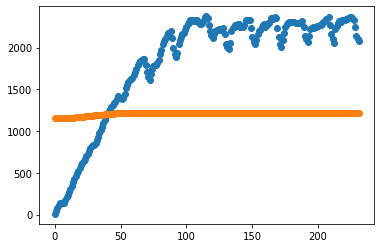

In [16]:
from sklearn.metrics import r2_score
R = r2_score(y_test , y_pred)
print ('R² :',R)
plt.scatter(range(0,len(y_test)),y_test)
plt.scatter(range(0,len(y_pred)),y_pred)
plt.show()